##### Implementation of Algorithm for finding largest inscribed rectangle in polygon

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

##### Helper functionality: 

In [176]:
def counter_clockwise(vertices):
    """
    given a set of vertices v_1, ... v_4 in R_2 as python lists:
    returns the set of vertices ordered counter-clockwise.
    """
    #First center the set of points:
    mX, mY = 0,0
    for x,y in vertices:
        mX += (x / 4)
        mY += (y / 4)
    
    for x,y in vertices:
        x -= mX
        y -= mY
    
    #Then compute their angles
    for vertex in vertices:
        x,y = vertex
        angle = math.degrees(math.atan2(y,x))
        angle = angle if angle >= 0 else -angle + 180
        vertex.append(angle)
    
    #sort based off of the angles
    vertices.sort(reverse=True, key=lambda tup: tup[2])
    
    #remove the angle measurement and decenter points
    for val in vertices:
        val.pop()
        x,y = val
        x += mX
        y += mY
        
    return vertices

def edges(vertices):
    """
    given a set of four vertices v_1, ..., v_4
    returns v_1,v_2 - v_2,v_3 - ... v_4,v_1
    """
    edges = []
    for i in range(4):
        p1, p2 = vertices[i % 4], vertices[(i + 1) % 4]
        edges.append([p1,p2])
    return edges

In [177]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])
    
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return 

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    
#     x_start_1, x_end_1 = line1[0][0], line1[1][0]
#     x_start_2, x_end_2 = line2[0][0], line2[1][0]
#     y_start_1, y_end_1 = line1[0][1], line1[1][1]
#     y_start_2, y_end_2 = line2[0][1], line2[1][1]
    
#     if min(x_start_1, x_end_1) < x and max(x_start_1, x_end_1) > x \
#        and min(x_start_2, x_end_2) < x and max(x_start_2, x_end_2) > x \
#        and min(y_start_1, y_end_1) < y and max(y_start_1, y_end_1) > y \
#        and min(y_start_2, y_end_2) < y and max(y_start_2, y_end_2) > y:
    return [x,y]

In [178]:
line_intersection([[0,5], [2.5,0]],[[0,2],[5,2]])

[1.5, 2.0]

In [233]:
points = [[1.0,0.0],[0.0,1.0],[-1.0,0.0],[0.0,-2.0]]

In [234]:
e = edges(counter_clockwise(points))
e

[[[0.0, -2.0], [-1.0, 0.0]],
 [[-1.0, 0.0], [0.0, 1.0]],
 [[0.0, 1.0], [1.0, 0.0]],
 [[1.0, 0.0], [0.0, -2.0]]]

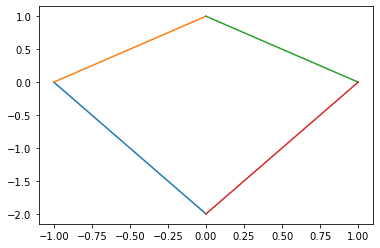

In [235]:
for edge in e:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

##### Find smallest containing rectangle (SAR) of polygon

In [236]:
def SAR(vertices):
    """
    args: vertices v_1,...,v_4
    returns edges of rectangle containing the polygon given by the vertices
    """
    max_x, max_y, min_x, min_y = float('-inf'), float('-inf'), float('inf'), float('inf')
    for x,y in vertices:
        max_x = max_x if max_x > x else x
        max_y = max_y if max_y > y else y
        min_x = min_x if min_x < x else x
        min_y = min_y if min_y < y else y
    
    rectangle_vertices = [[min_x,min_y], [min_x,max_y], [max_x, max_y], [max_x, min_y]]
    return rectangle_vertices

In [237]:
rec = SAR(points)
rec_edges = edges(rec)

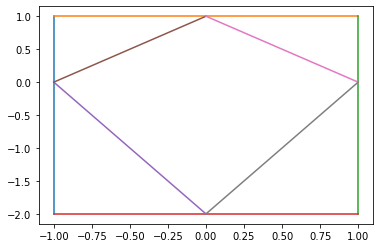

In [238]:
#verifying SAR functionality
for edge in rec_edges:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])
for edge in e:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

#### Drawing horizontal and vertical lines

In [239]:
def vertical_lines(vertices):
    SAR_vertices = SAR(vertices)
    min_y, max_y = SAR_vertices[0][1], SAR_vertices[1][1]
    v_lines = []
    for x, _ in counter_clockwise(vertices):
        start, end = [x, min_y], [x, max_y]
        v_lines.append([start, end])
    return v_lines

In [240]:
def horizontal_lines(vertices):
    SAR_vertices = SAR(vertices)
    min_x, max_x = SAR_vertices[0][0], SAR_vertices[2][0]
    h_lines = []
    for _, y in counter_clockwise(vertices):
        start, end = [min_x, y], [max_x, y]
        h_lines.append([start,end])
    return h_lines

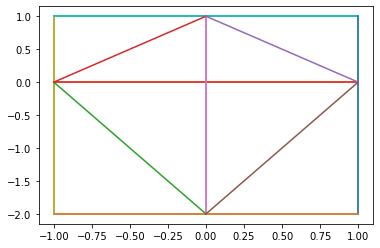

In [241]:
h_lines = horizontal_lines(points)
v_lines = vertical_lines(points)
for edge in h_lines:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

for edge in v_lines:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

for edge in edges(rec):
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

for edge in e:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

In [242]:
def polygon_lines(vertices):
    """
    
    """
    h_lines, v_lines = horizontal_lines(vertices), vertical_lines(vertices)
    SAR_vertices = SAR(vertices)
    min_y, max_y = SAR_vertices[0][1], SAR_vertices[1][1]
    min_x, max_x = SAR_vertices[0][0], SAR_vertices[2][0]
    e = edges(counter_clockwise(points))
    total_lines = []
    pts = []
    for edge_line in e:
        for line in h_lines:
            pt = line_intersection(edge_line, line)
            if pt is not None:
                x, y = pt
                if x >= min_x and x <= max_x:
                    print(pt, edge_line, line)
                    h_line = [[min_x, y], [max_x, y]]
                    v_line = [[x, min_y], [x, max_y]]
                    total_lines.append(h_line)
                    total_lines.append(v_line)
                    pts.append(pt)
        
        for line in v_lines:
            pt = line_intersection(edge_line, line)
            if pt is not None:
                x,y = pt
                if y >= min_y and y <= max_y:
                    print(pt, edge_line, line)
                    h_line = [[min_x, y], [max_x, y]]
                    v_line = [[x, min_y], [x, max_y]]
                    total_lines.append(h_line)
                    total_lines.append(v_line)
                    pts.append(pt)
    return h_lines + v_lines + total_lines, pts

In [243]:
p_lines, pts = polygon_lines(points)

[-0.0, -2.0] [[0.0, -2.0], [-1.0, 0.0]] [[-1.0, -2.0], [1.0, -2.0]]
[-1.0, 0.0] [[0.0, -2.0], [-1.0, 0.0]] [[-1.0, 0.0], [1.0, 0.0]]
[-1.0, 0.0] [[0.0, -2.0], [-1.0, 0.0]] [[-1.0, 0.0], [1.0, 0.0]]
[0.0, -2.0] [[0.0, -2.0], [-1.0, 0.0]] [[0.0, -2.0], [0.0, 1.0]]
[-1.0, -0.0] [[0.0, -2.0], [-1.0, 0.0]] [[-1.0, -2.0], [-1.0, 1.0]]
[0.0, -2.0] [[0.0, -2.0], [-1.0, 0.0]] [[0.0, -2.0], [0.0, 1.0]]
[-1.0, 0.0] [[-1.0, 0.0], [0.0, 1.0]] [[-1.0, 0.0], [1.0, 0.0]]
[-0.0, 1.0] [[-1.0, 0.0], [0.0, 1.0]] [[-1.0, 1.0], [1.0, 1.0]]
[-1.0, 0.0] [[-1.0, 0.0], [0.0, 1.0]] [[-1.0, 0.0], [1.0, 0.0]]
[0.0, 1.0] [[-1.0, 0.0], [0.0, 1.0]] [[0.0, -2.0], [0.0, 1.0]]
[-1.0, 0.0] [[-1.0, 0.0], [0.0, 1.0]] [[-1.0, -2.0], [-1.0, 1.0]]
[0.0, 1.0] [[-1.0, 0.0], [0.0, 1.0]] [[0.0, -2.0], [0.0, 1.0]]
[1.0, 0.0] [[0.0, 1.0], [1.0, 0.0]] [[-1.0, 0.0], [1.0, 0.0]]
[0.0, 1.0] [[0.0, 1.0], [1.0, 0.0]] [[-1.0, 1.0], [1.0, 1.0]]
[1.0, 0.0] [[0.0, 1.0], [1.0, 0.0]] [[-1.0, 0.0], [1.0, 0.0]]
[0.0, 1.0] [[0.0, 1.0], [1.0, 0.0]

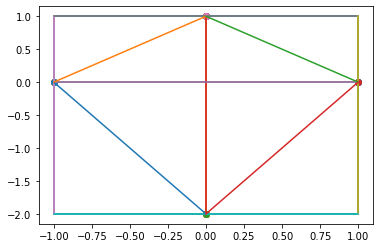

In [245]:
for edge in p_lines:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])
for edge in rec_edges:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])
for edge in e:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

for x,y in pts:
    plt.scatter(x,y)

#### Algorithm 1: Examining the type of edges in a polygon 

In [ ]:
def edge_types(vertices):
    """
    args: vertices v_1,...,v_4
    returns a dictionary mapping edges to edge types based of vertices
    """
    polygon_edges = edges(counter_clockwise(vertices))
    
    edge_types = dict()
    for edge in polygon_edges:
        x_start, x_end = edge[0][0], edge[1][0]
        y_start, y_end = edge[0][1], edge[1][1]
        e  = (tuple(edge[0]), tuple(edge[1]))
        if (x_start < x_end and y_end > y_start):
            edge_types[e] = 1
        elif (x_start > x_end and y_end > y_start):
            edge_types[e] = 2
        elif (x_start > x_end and y_end < y_start):
            edge_types[e] = 3
        elif (x_start < x_end and y_end < y_start):
            edge_types[e] = 4
        elif (x_start == x_end and y_end > y_start):
            edge_types[e] = 5
        elif (x_start > x_end and y_end == y_start):
            edge_types[e] = 6
        elif (x_start == x_end and y_end < y_start):
            edge_types[e] = 7
        else:
            if (x_start < x_end and y_end == y_start):
                edge_types[e] = 8
            else:
                raise ValueError("Invalid set of vertices given")
    return edge_types
    

In [ ]:
types = edge_types(points)